## Submit job

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from pathlib import Path

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path="program/check_rabi.py",
    device_id="urchin-pulse",
    name="check_rabi",
)
print(f"job_id = {job.job_id}")
job.wait_for_completion()
print(f"job_status = {job.status}")
print(f"elapsed_time={job.execution_time}")

job_id = 068db9ea-2552-747a-8000-ee7fd92dad73
job_status = succeeded
elapsed_time=23.588


## Download job result

In [2]:
Path("download").mkdir(exist_ok=True)
backend.download_log(
    job_id=job.job_id,
    save_dir="download",
)


'download/sselog_068db9ea-2552-747a-8000-ee7fd92dad73.zip'

## Extract zip file

In [3]:
import zipfile
zip_path = Path(f"download/sselog_{job.job_id}.zip")
extract_dir = Path("extracted")

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
log_path = extract_dir / "ssecontainer.log"
new_log_path = extract_dir / f"sselog_{job.job_id}.log"

# rename
if log_path.exists():
    log_path.rename(new_log_path)

print("extracted file:", list(extract_dir.rglob("*")))

with new_log_path.open(encoding="utf-8") as f:
    for i, line in enumerate(f, start=1):
        print(f"{i}: {line.strip()}")

extracted file: [PosixPath('extracted/sselog_068db9ea-2552-747a-8000-ee7fd92dad73.log'), PosixPath('extracted/sselog_068d43a1-8db5-7ed2-8000-a70b43690f76.log'), PosixPath('extracted/sselog_068d44cf-8a69-7bbd-8000-e62ed35217cd.log'), PosixPath('extracted/sselog_068d448d-9e95-713f-8000-205d35190713.log'), PosixPath('extracted/sselog_068d4398-51f5-79c9-8000-eca7e8f7b08e.log'), PosixPath('extracted/ssecontainer_068d438e-ab45-7d8b-8000-49abd316f766.log'), PosixPath('extracted/sselog_068d4466-1937-7e0c-8000-82f3289c43c7.log'), PosixPath('extracted/sselog_068d43c0-bf35-7017-8000-2912b8176b35.log'), PosixPath('extracted/sselog_068d43e5-89ff-717f-8000-6979c4aaae95.log'), PosixPath('extracted/sselog_068d4433-e736-7b6b-8000-d30f24c2934f.log'), PosixPath('extracted/sselog_068d43d7-2c3a-776e-8000-70b2ffcb2a20.log')]
1: Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux
2: Type "help", "copyright", "credits" or "license" for more information.
3: >>> start program
4: Failed to load the

## Extract payload

In [4]:
from pathlib import Path
import ast

payloads = []
with new_log_path.open(encoding="utf-8") as f:
    for line in f:
        if "payload=" in line:
            rhs = line.split("payload=", 1)[1].strip()
            try:
                data = ast.literal_eval(rhs)
                payloads.append(data)
            except Exception as e:
                print("parse error:", e)

print(payloads)


[{'mode': '', 'data': {'Q024': {'raw': {'I': [0.03341231495141983, 0.02549157664179802, 0.004491714294999838, -0.021189097315073013, -0.03240152448415756, -0.02851490117609501, -0.008352434262633324, 0.014657575637102127, 0.03144201636314392, 0.03073738142848015, 0.016677111387252808, -0.009089135564863682, -0.02951763942837715, -0.03281770646572113, -0.018693452700972557, 0.003022299148142338, 0.024283625185489655, 0.03393904119729996, 0.025931842625141144, 0.003501330502331257, -0.020990200340747833, -0.03362627699971199, -0.02677958272397518, -0.008173830807209015, 0.016064543277025223, 0.03208690881729126, 0.02946430630981922, 0.014167258515954018, -0.008560220710933208, -0.02868896722793579, -0.029446883127093315, -0.019090458750724792, 0.004973991308361292, 0.02381734922528267, 0.03416133671998978, 0.02446981891989708, 0.00353033235296607, -0.020836874842643738, -0.031383730471134186, -0.02567334659397602, -0.007724996190518141, 0.013644687831401825, 0.03158183395862579, 0.030415

## Plot IQ data

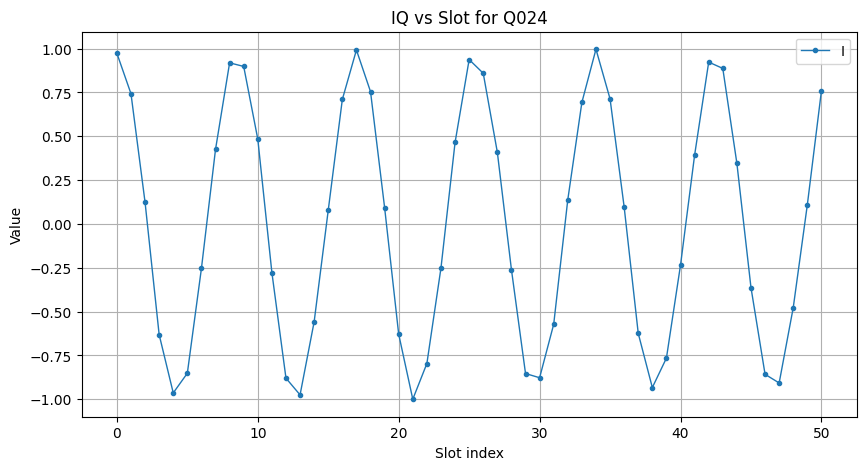

In [ ]:
import matplotlib.pyplot as plt
p = payloads[0]

raw = p["data"]["Q024"]["normalized"]
i = raw["I"]
q = raw["Q"]

slots = list(range(len(i)))

plt.figure(figsize=(10, 5))
plt.plot(slots, i, label="I", marker="o", markersize=3, linewidth=1)
plt.xlabel("Slot index")
plt.ylabel("Value")
plt.title("IQ vs Slot for Q024")
plt.legend()
plt.grid(True)
plt.show()